|Alunos                |Matrícula  |
|----------------------|-----------|
|Caio Bertoldo         |2215080050 |
|Danilo Jorge          |2215080007 |
|Diogo Gomes           |2215080033 |
|Guilherme Montenegro  |2215080011 |
|Leonardo Abinader     |2215080042 |

### Bibliotecas

In [12]:
import numpy as np
import matplotlib.pyplot as plt

### Verificando os dados

In [13]:
dados = np.fromfile('rna-2025.1-pp2.1-dados/dataAll.txt')
dados

array([-363.7884,  244.1423,    0.    , ..., -140.147 ,  734.0983,
          0.    ], shape=(3000,))

In [14]:
m = dados.size//3
dados = dados.reshape((m,1,3))
print(dados.shape)
print(dados.dtype)

(1000, 1, 3)
float64


In [15]:
dados

array([[[-363.7884,  244.1423,    0.    ]],

       [[ 328.7572, -256.7658,    1.    ]],

       [[-164.9827,  613.2164,    0.    ]],

       ...,

       [[ 872.4311,  669.1192,    1.    ]],

       [[ 822.6894, -702.6489,    1.    ]],

       [[-140.147 ,  734.0983,    0.    ]]], shape=(1000, 1, 3))

In [16]:
X = np.array([[linha[0][0], linha[0][1]] for linha in dados])
y = np.array([[linha[0][2]] for linha in dados]).ravel()

In [17]:
X

array([[-363.7884,  244.1423],
       [ 328.7572, -256.7658],
       [-164.9827,  613.2164],
       ...,
       [ 872.4311,  669.1192],
       [ 822.6894, -702.6489],
       [-140.147 ,  734.0983]], shape=(1000, 2))

In [18]:
y

array([0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
       1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0.

### Perceptron

In [19]:
class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.necessary_epochs = None
        self.total_adjust = 0
    
    def step(self, x):
        return 1 if x >= 0 else 0
    
    def check_error(self, y_predicted, y):
        return y_predicted != y

    def fit(self, X, y):
        #n_samples, n_features = X.shape
        # self.weights = (np.random.uniform(-0.5, 0.5), np.random.uniform(-0.5, 0.5))
        self.weights = np.random.uniform(low=-0.5, high=0.5, size=2)
        print("Pesos iniciais: ", self.weights)
        self.bias = 0
        self.necessary_epochs = 0
        

        for _ in range(self.epochs):
            self.necessary_epochs +=1
            error_counter = 0
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.step(linear_output)
                # print(y_predicted, y[idx], '   ')
                if(self.check_error(y_predicted, y[idx])):
                    
                    update = self.learning_rate * (y[idx] - y_predicted)
                    self.weights += update * x_i
                    self.bias += update
                    error_counter +=1
                    self.total_adjust+=1
                else:
                    pass
            if error_counter ==0:
                return
            # print('\n')

    def predict(self, X):
        # linear_output = np.dot(X, self.weights) + self.bias
        # return step(linear_output)
        return np.array([self.step(np.dot(X[i], self.weights) + self.bias) for i in range(X.shape[0])])


In [20]:
perceptron = Perceptron()
perceptron.fit(X, y)

Pesos iniciais:  [-0.15122045 -0.49303508]


In [21]:

# Fazendo previsões
print(f"\nÉpocas necessárias: {perceptron.necessary_epochs}")
print(f"Total de ajuste de pesos: {perceptron.total_adjust}")
predictions = perceptron.predict(X)
print(f"Predições: {predictions}")



Épocas necessárias: 18
Total de ajuste de pesos: 217
Predições: [0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1
 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1
 0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1
 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 0
 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0
 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1
 1 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0
 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1
 1 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0
 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0
 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1
 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0
 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 

### Gráfico

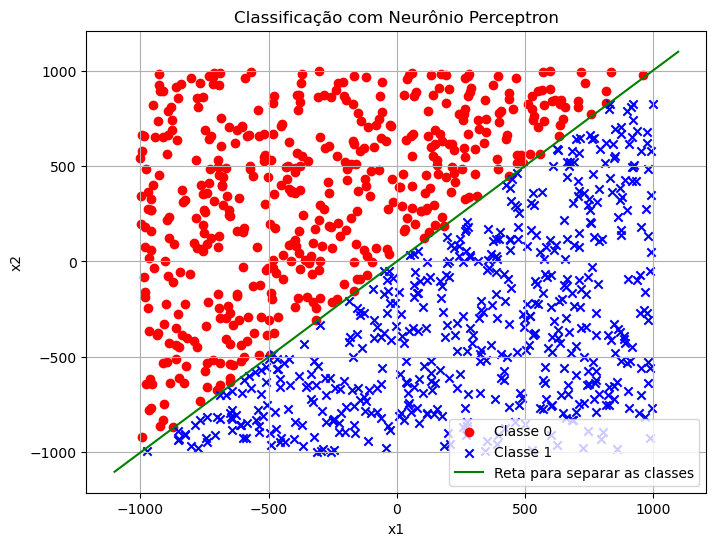

In [22]:
# Separar os pontos por classe
X0 = X[y == 0]
X1 = X[y == 1]

plt.figure(figsize=(8, 6))
plt.scatter(X0[:, 0], X0[:, 1], color='red', marker='o', label='Classe 0')
plt.scatter(X1[:, 0], X1[:, 1], color='blue', marker='x', label='Classe 1')

xMin, xMax = plt.xlim()
xVals = np.linspace(xMin, xMax, 100)
w1, w2 = perceptron.weights
bias = perceptron.bias
yVals = -(w1 / w2) * xVals - (bias / w2)

plt.plot(xVals, yVals, color='green', label='Reta para separar as classes')

plt.title("Classificação com Neurônio Perceptron")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()